<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/examples/fastdup_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastdup Tutorial: Analyze Video

In [1]:
!pip install -U fastdup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 2.0 MB/s 


## Download Sample dataset

In [ ]:
# Data is found here: https://github.com/4ML-platform/ndvr

In [7]:

!mc cp --recursive google/visual_db/datasets/index-videos index-videos

#!gdown 1KwXKSJUH6Uh6uunfg4e2j8x4MFH4dsH8

`google/visual_db/datasets/index-videos/index-videos/blackborder.bmw.mp4` -> `index-videos/index-videos/index-videos/blackborder.bmw.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.garba.mp4` -> `index-videos/index-videos/index-videos/blackborder.garba.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.iron-man.mp4` -> `index-videos/index-videos/index-videos/blackborder.iron-man.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.messi.mp4` -> `index-videos/index-videos/index-videos/blackborder.messi.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.messivskids.mp4` -> `index-videos/index-videos/index-videos/blackborder.messivskids.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.superman.mp4` -> `index-videos/index-videos/index-videos/blackborder.superman.mp4`
`google/visual_db/datasets/index-videos/index-videos/cropper.bmw.mp4` -> `index-videos/index-videos/index-videos/cropper.bmw.mp4

## Run Fastdup to gain insights from video

## Extract feature vectors from Video

Note: video extraction is slow on the free Colab notebook as only 1 core is used. It is recommended to run on a 32 core machine to speed up extraction.

In [9]:
%pip install wurlitzer
%load_ext wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [2]:
!rm -fr out
# run fastdup to extract key frames from video. num_images=3 means we run on the first 3 videos.
import fastdup 
fastdup.run('index-videos', work_dir='out',verbose=0, run_mode=1, nearest_neighbors_k=10)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Going to loop over dir index-videos
Found total 24 videos to run on


0

## Build nearest neighbor model

In [16]:

fastdup.run('index-videos', work_dir='out', run_mode=2, nearest_neighbors_k=30, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found total 2246 images to run on
61000) Finished write_index() NN model
Stored nn model index file out/nnf.index
1667121048 : INFO:     (add_vertices:460): Num vertices for group 0: 2246
1667121048 : INFO:     (commit_edge_buffer:609): In commit edge buffer (0,0)
1667121048 : INFO:     (commit_edge_buffer:680): Shuffling edges ...
1667121048 : INFO:     (commit_edge_buffer:688): Done shuffling edges in 0.016709 secs
1667121048 : INFO:     (commit_edge_buffer:692): Aggregating unique vertices...
1667121048 : INFO:     (commit_edge_buffer:705): Done aggregating unique vertex in 0.011995 secs
1667121048 : INFO:     (commit_edge_buffer:713): Combine vertex data
1667121048 : INFO:     (commit_edge_buffer:779): Done phase 2 in 0.002171 secs
1667121048 : INFO:     (commit_edge_buffer:787): Rename id columns 
1667121048 : INFO:     (commit_edge_buffer:890): Done in 0.057383 secs
1667121048 : INFO:     (commit_edge_buff

0

## Find similarities across different videos

In [17]:
import os
fastdup.create_duplicate_videos_gallery('out', save_path='.', num_images=50, get_reformat_filename_func=lambda x: os.path.dirname(x).replace('out/tmp/index-videosindex-videosindex-videos',''))

100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Stored similarity visual view in  ./similarity.html
Warning, failed to remove image file  ./output_000043_output_000032.jpg  with error  [Errno 2] No such file or directory: './output_000043_output_000032.jpg'


0

,Image,Distance,From,To,counts
0,,0.999918,speeder.messivskids.mp4,cropper.messivskids.mp4,65
2,,0.978299,blackborder.garba.mp4,speeder.garba.mp4,4
4,,0.956496,speeder.superman.mp4,cropper.superman.mp4,74
6,,0.938353,blackborder.bmw.mp4,speeder.bmw.mp4,23
8,,0.932112,blackborder.iron-man.mp4,speeder.iron-man.mp4,31
10,,0.923943,speeder.messi.mp4,cropper.messi.mp4,58
12,,0.922935,blackborder.messi.mp4,speeder.messi.mp4,16
14,,0.914884,blackborder.garba.mp4,cropper.garba.mp4,4
16,,0.906030,rotator90.bmw.mp4,blackborder.bmw.mp4,7
18,,0.904807,cropper.garba.mp4,speeder.garba.mp4,50

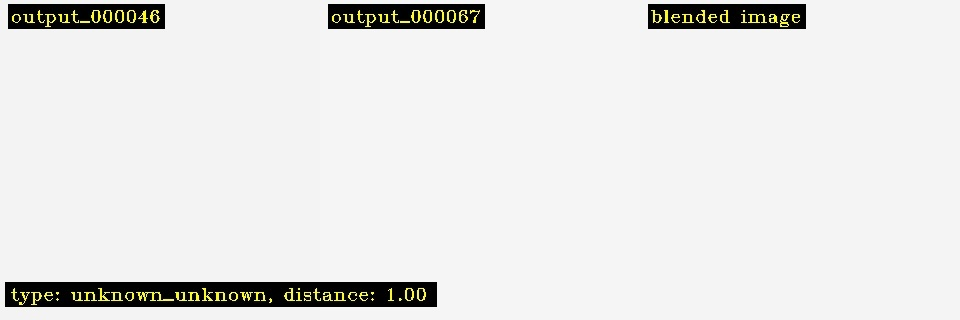
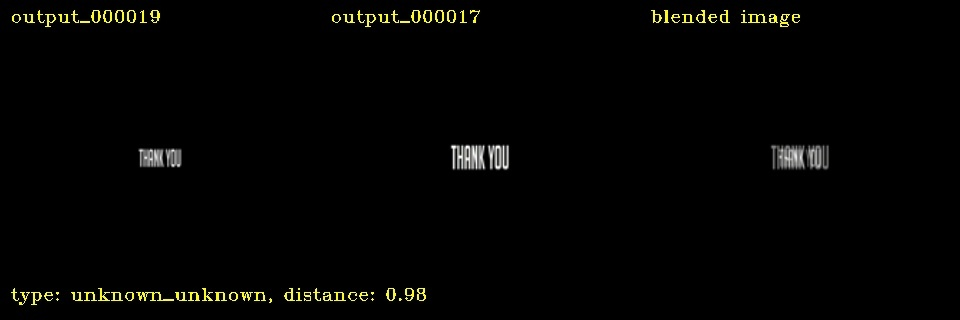
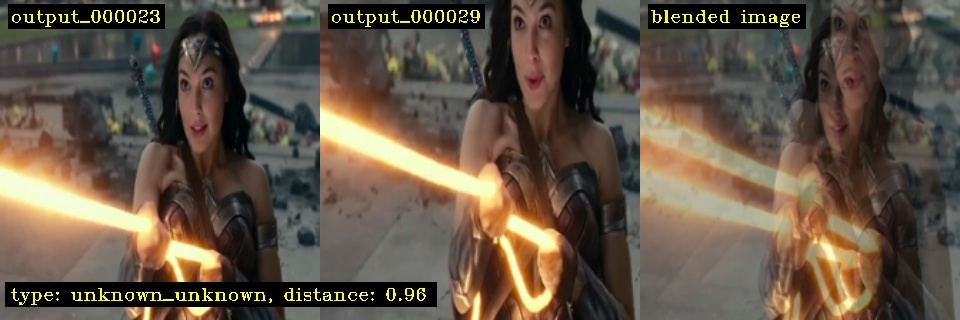
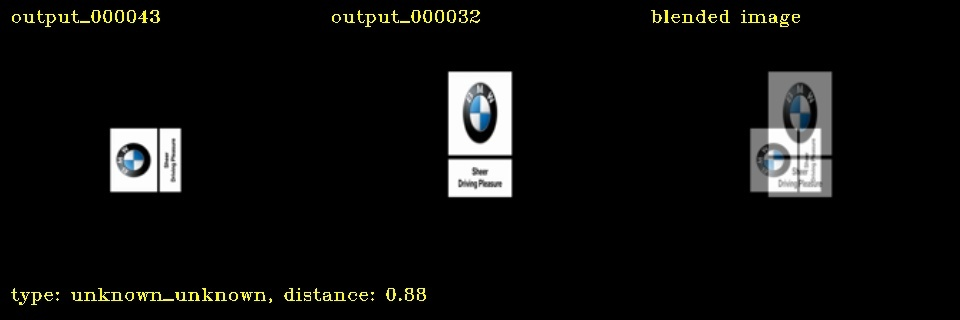
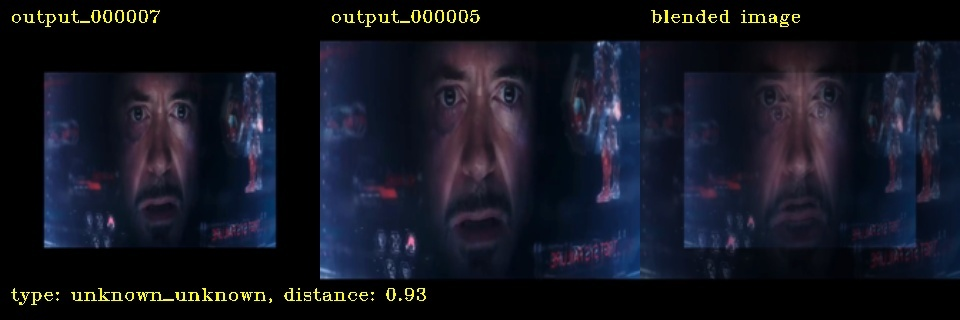
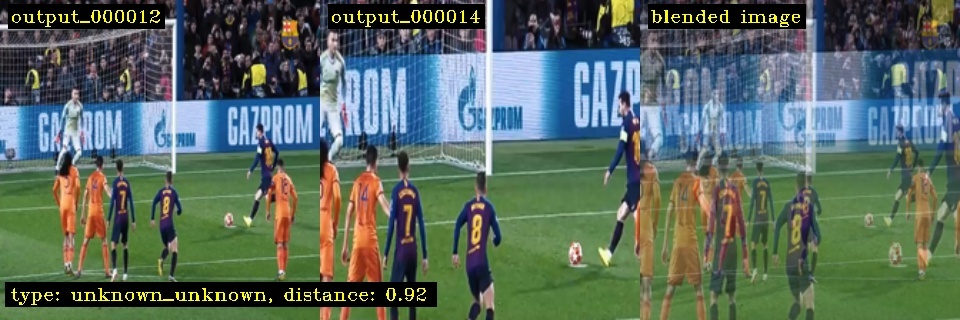
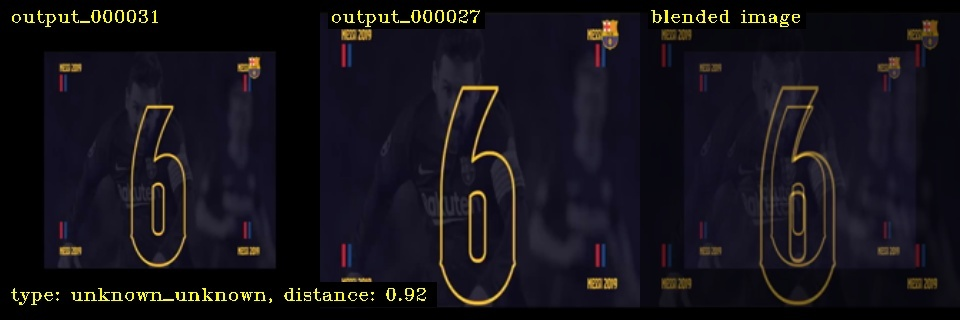
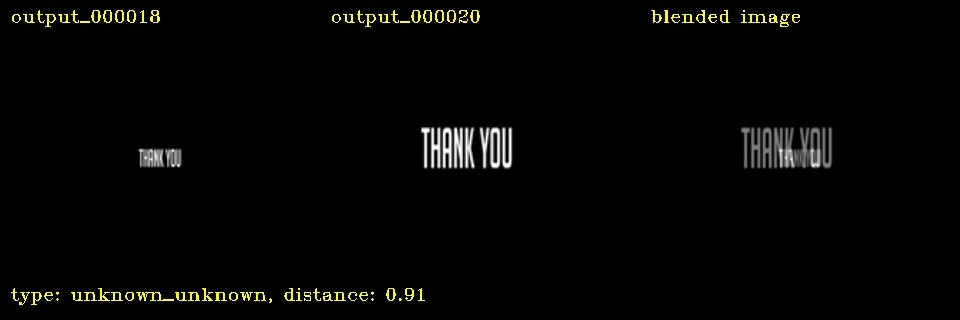
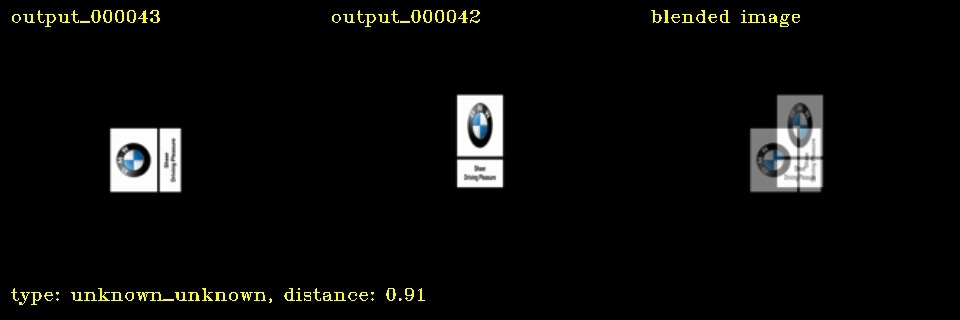
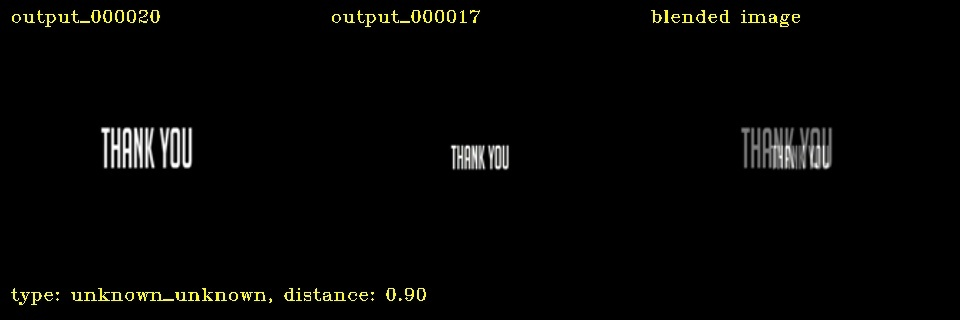
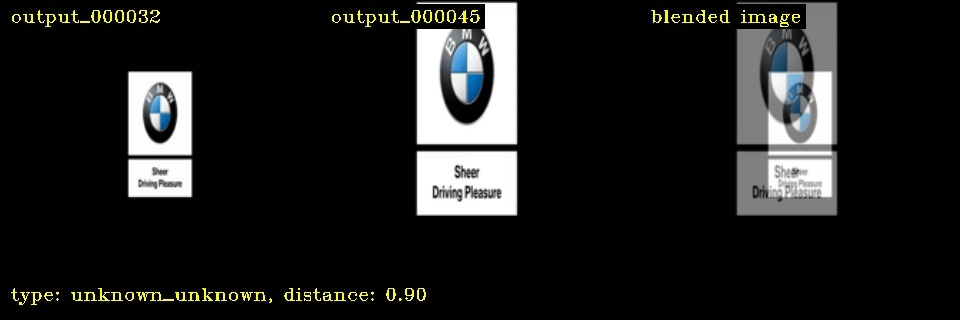
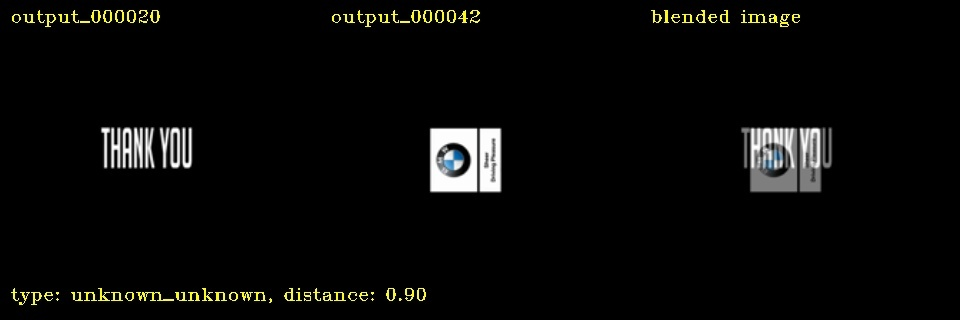
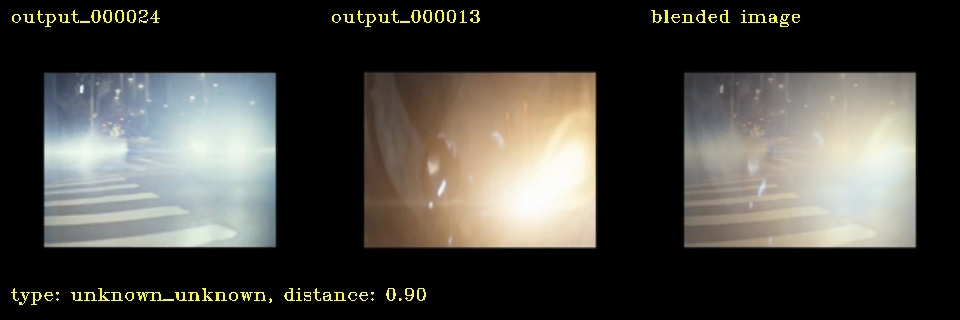
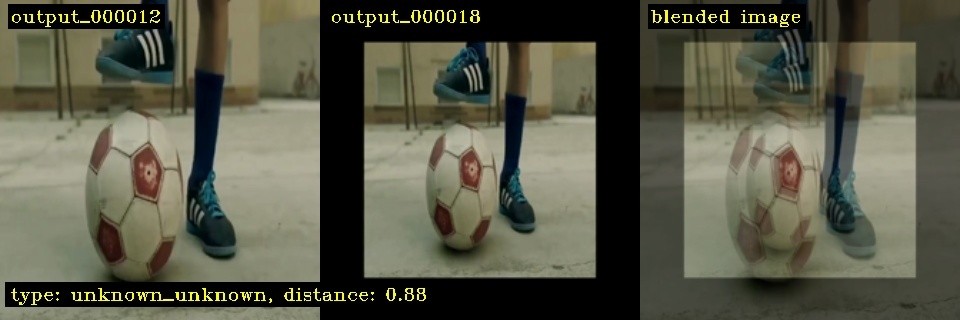
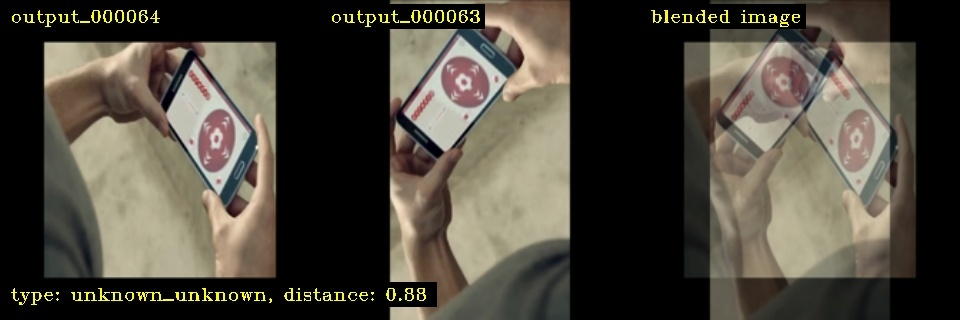
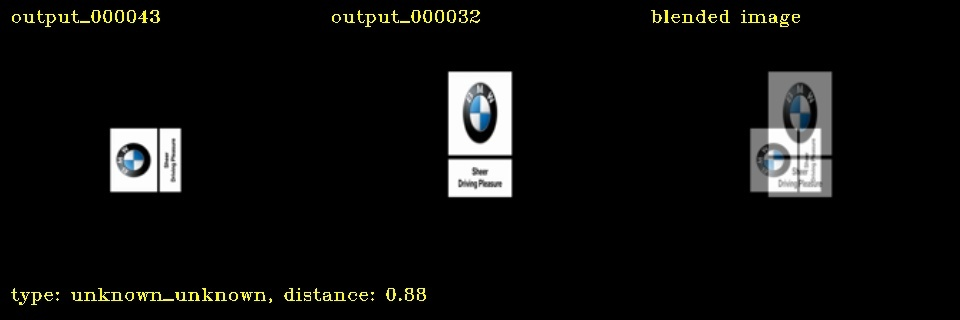
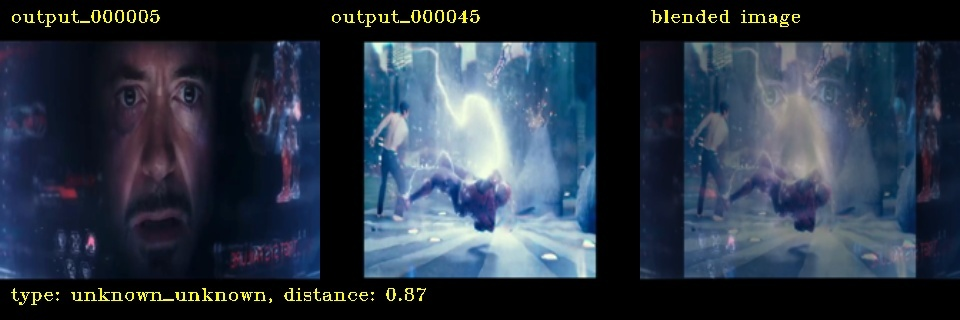
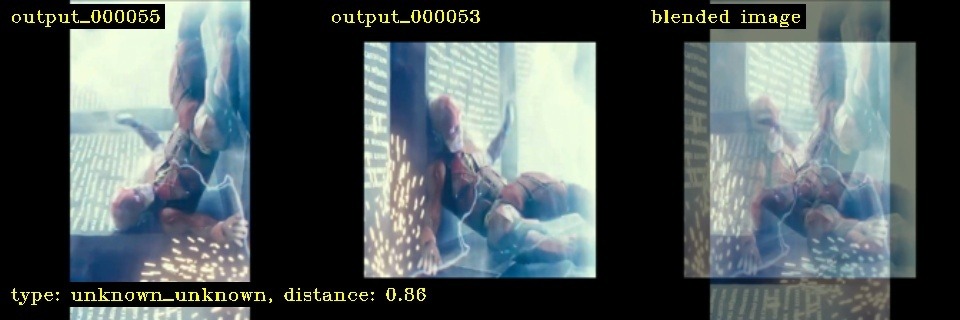
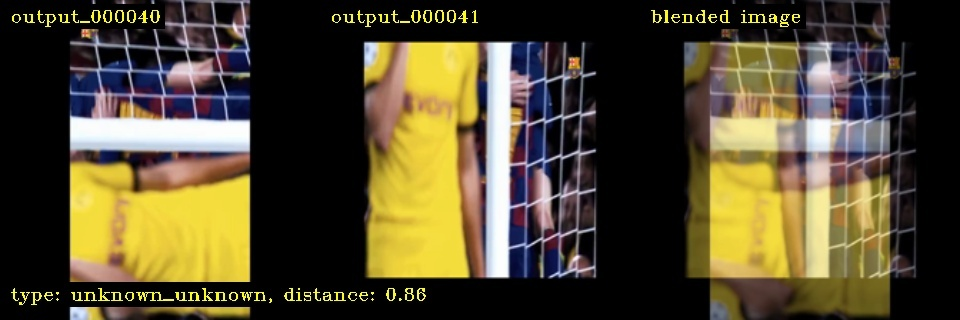
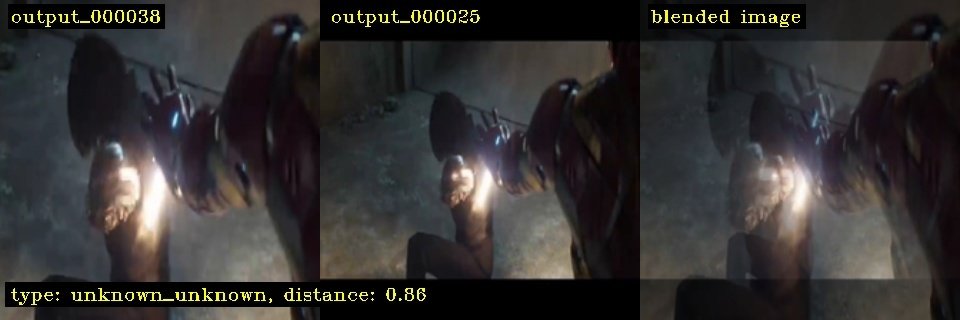
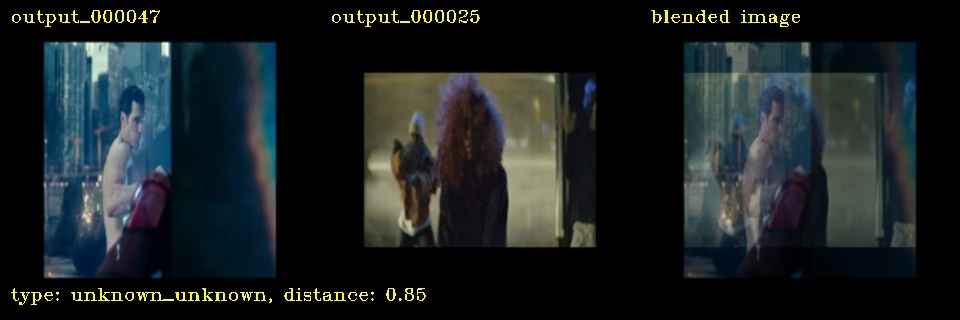
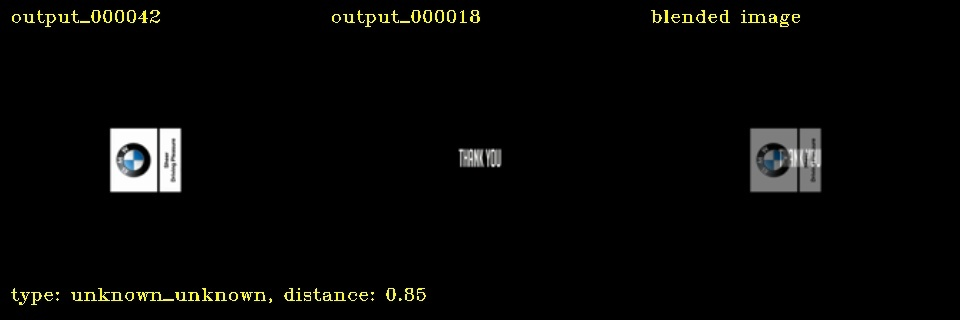
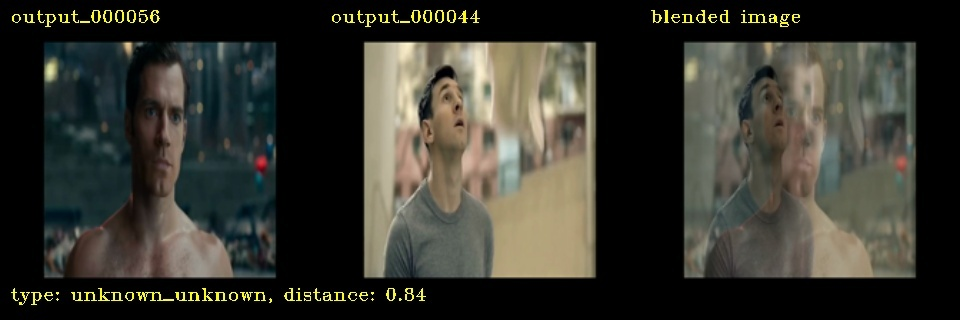
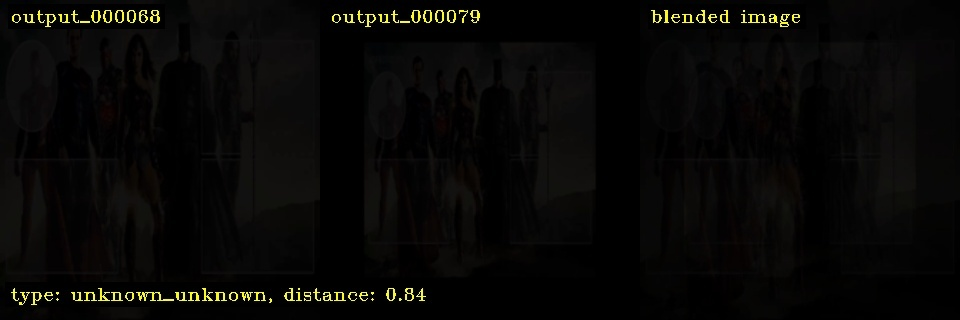
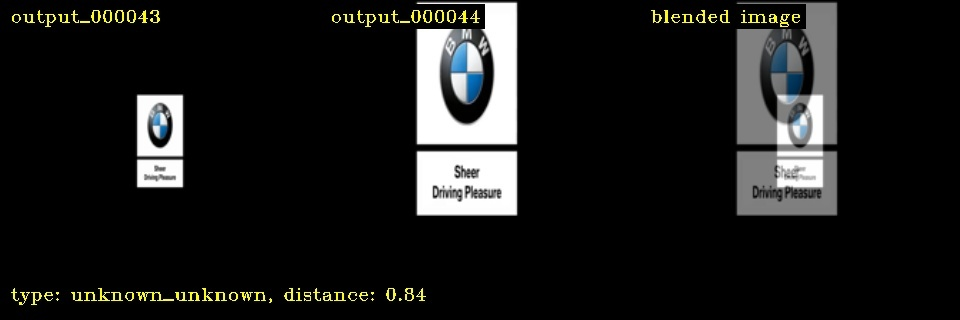

In [18]:
from IPython.display import HTML
HTML('similarity.html')